In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix


In [82]:
# attributes:

# Sex / nominal / -- / M, F, and I (infant) 
# Length / continuous / mm / Longest shell measurement 
# Diameter	/ continuous / mm / perpendicular to length 
# Height / continuous / mm / with meat in shell 
# Whole weight / continuous / grams / whole abalone 
# Shucked weight / continuous	/ grams / weight of meat 
# Viscera weight / continuous / grams / gut weight (after bleeding) 
# Shell weight / continuous / grams / after being dried 
# Rings / integer / -- / +1.5 gives the age in years 

In [83]:
name= ['sex/nominal','Length','diameter','height','whole wt','Shucked weight','Viscera weight','Shell weight','Rings']
abalone = pd.read_csv("./datasets/abalonedata.csv",names=name)
abalone.head()

,sex/nominal,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [84]:
abalone.shape

(4177, 9)

In [85]:
features=abalone.loc[:,'Length':'Shell weight']
features.head()

,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [86]:
target = abalone.loc[:,'Rings']
target.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [87]:
target.shape

(4177,)

In [88]:
nominal_values = abalone['sex/nominal']

In [89]:
nominal = []
i=0
length = len(nominal_values)
for i in range(length):
    if(nominal_values[i] =='I'):
        nominal.append(0)
       
    elif(nominal_values[i] == 'M'):
        nominal.append(1)
    else:
        nominal.append(2)
        


In [90]:
df = np.array(nominal)
df=df.reshape(4177,1)

In [91]:
nominal = pd.DataFrame(df,columns=['sex/nominal'])
nominal.head()


,sex/nominal
0,1
1,1
2,2
3,1
4,0


In [92]:
features.head()

,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [94]:
features = pd.concat([nominal,features],axis=1)
features.head()

,sex/nominal,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [95]:
data = pd.concat([features,target],axis=1)
data.head()

,sex/nominal,Length,diameter,height,whole wt,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [96]:
x1 = np.array(data['diameter'])
x2 = np.array(data['Length'])
y= np.array(data['Rings'])

In [97]:
x = np.column_stack((x1,x2))

In [111]:
x

array([[0.365, 0.455],
       [0.265, 0.35 ],
       [0.42 , 0.53 ],
       ...,
       [0.475, 0.6  ],
       [0.485, 0.625],
       [0.555, 0.71 ]])

In [98]:
y.shape

(4177,)

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [100]:
xtrain

array([[0.54 , 0.68 ],
       [0.22 , 0.3  ],
       [0.545, 0.685],
       ...,
       [0.435, 0.535],
       [0.29 , 0.4  ],
       [0.275, 0.35 ]])

In [101]:
xtrain.shape

(2923, 2)

In [102]:
ytrain.shape

(2923,)

In [103]:
scaler = MinMaxScaler()

In [104]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [105]:
int(np.sqrt(len(xtrain)))    

54

In [106]:
classifier = KNeighborsClassifier(n_neighbors=54,metric='minkowski',p=2) 

In [107]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=54, p=2,
           weights='uniform')

In [108]:
ypred = classifier.predict(xtest)
ypred

array([ 4,  9,  7, ..., 10,  6,  9], dtype=int64)

In [113]:
cm = confusion_matrix(ytest,ypred)


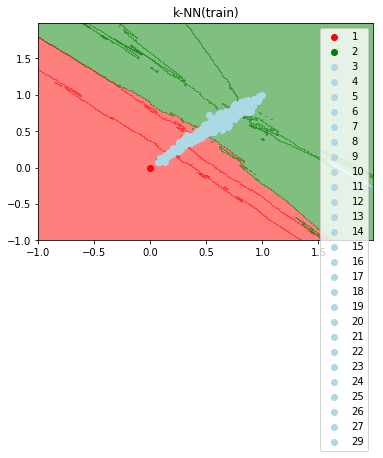

In [114]:
x_set,y_set = xtrain,ytrain

x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))
                   
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                     alpha=0.5,cmap=ListedColormap(('red','green','lightblue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
                c = ListedColormap(('red','green','lightblue'))(i),label=j)
             
plt.title('k-NN(train)')
plt.legend()

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.2511961722488038
